In [1]:
from fastai.conv_learner import *
import re

In [2]:
arch = resnext101_64
sz = 256
path = './data/'
bs = 64

In [3]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.1)
data = ImageClassifierData.from_paths(path, test_name='test', tfms=tfms)

In [4]:
learn = ConvLearner.pretrained(arch, data, ps=0.5, precompute=True, xtra_fc=[500])

### Learning with precompute

In [5]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 80%|███████▉  | 51/64 [00:01<00:00, 31.91it/s, loss=15.6]


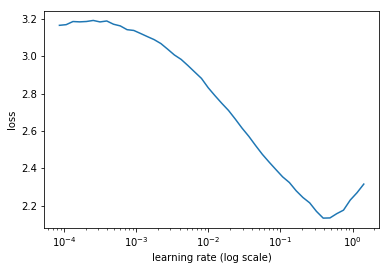

In [6]:
learn.sched.plot()

In [7]:
learn.fit(0.1, 2, cycle_len=3)

HBox(children=(IntProgress(value=0, description='Epoch', max=6), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      1.420201   0.5411     0.81901   
    1      0.848565   0.42052    0.86849                   
    2      0.585403   0.346292   0.871094                  
    3      0.612128   0.345286   0.890625                  
    4      0.522268   0.370859   0.894531                  
    5      0.407137   0.339545   0.903646                  



[0.33954492, 0.9036458333333334]

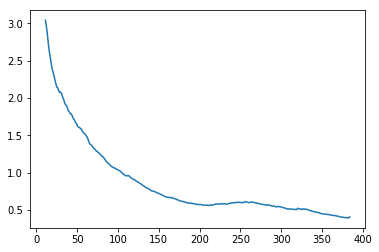

In [8]:
learn.sched.plot_loss()

### Learn with data augmentation

In [9]:
learn.precompute = False

In [10]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 95%|█████████▌| 61/64 [01:06<00:03,  1.08s/it, loss=2.74] 

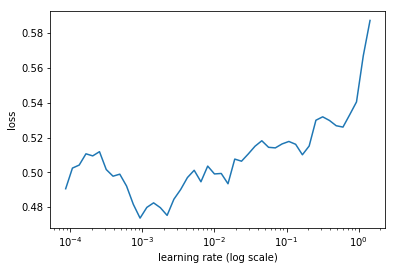

In [11]:
learn.sched.plot()

In [12]:
learn.fit(0.0005, 2, cycle_len=3)

HBox(children=(IntProgress(value=0, description='Epoch', max=6), HTML(value='')))

  0%|          | 0/64 [00:00<?, ?it/s]                    


Exception in thread Thread-13:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                  
    0      0.516649   0.255456   0.916667  
    1      0.497982   0.255146   0.910156                  
    2      0.480939   0.260005   0.91276                   
    3      0.506285   0.248125   0.911458                  
    4      0.521861   0.254047   0.915365                  
    5      0.53383    0.256669   0.914062                  



[0.2566694, 0.9140625]

In [ ]:
learn.save("resnext_101_64")

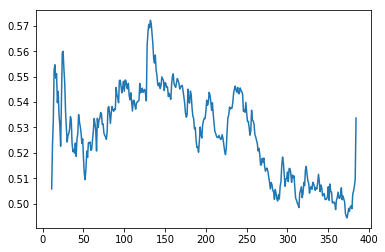

In [13]:
learn.sched.plot_loss()

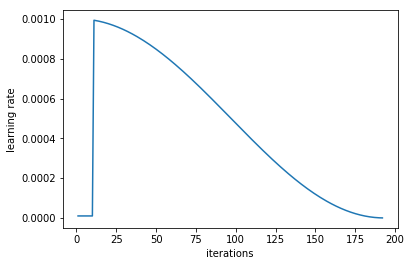

In [31]:
learn.sched.plot_lr()

## Learn with unfreezing the layers

In [14]:
learn.unfreeze()

In [15]:
learn.lr_find()
learn.sched.plot()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

  0%|          | 0/64 [00:00<?, ?it/s]


RuntimeError: cuda runtime error (2) : out of memory at /opt/conda/conda-bld/pytorch_1512387374934/work/torch/lib/THC/generic/THCStorage.cu:58

In [80]:
learn.fit([1e-4, 1e-3, 1e-2], 3)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.436223   0.243165   0.920573  
    1      0.433296   0.246881   0.897135                  
    2      0.411596   0.228802   0.934896                  



[0.22880185, 0.9348958333333334]

In [84]:
submit(learn)

 25%|██▌       | 1/4 [00:13<00:39, 13.29s/it]

KeyboardInterrupt: 

## Make Submission

In [81]:
def submit(learn):
    log_probs = learn.TTA(is_test=True)
    probs = np.exp(log_probs[0])
    probs = np.mean(probs, axis=0)
    preds = np.argmax(probs, axis=1)
    pred_classes = list(map(lambda x: learn.data.classes[x], preds))
    fnames = list(map(lambda x: re.split('/', x)[1], learn.data.test_ds.fnames))
    
    df = pd.DataFrame({'file': fnames, 'species': pred_classes})
    df.to_csv(f'{path}results/results.csv', index=False)
    !kg submit {path}results/results.csv

In [85]:
FileLink(f'{path}results/results.csv')

/home/paperspace/kaggle/plant-seedlings-classification/data/results/results.csv